In [66]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Cleaning

In [67]:
df1 = pd.read_csv('customers.csv')
df2 = pd.read_csv('orders.csv')
df3 = pd.read_csv('products.csv')
df4 = pd.read_csv('ratings.csv')

In [68]:
df1.describe()

,customer_id
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [69]:
df2.describe()

,order_id,customer_id,product_id,quantity
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,48.708000,25.556000,2.413000
std,288.819436,28.923646,14.766683,1.115202
min,1.000000,1.000000,1.000000,1.000000
25%,250.750000,24.750000,12.000000,1.000000
50%,500.500000,48.000000,26.000000,2.000000
75%,750.250000,72.000000,38.000000,3.000000
max,1000.000000,100.000000,50.000000,4.000000


In [70]:
df3.describe()

,product_id,price
count,50.00000,50.00000
mean,25.50000,557.84000
std,14.57738,279.22724
min,1.00000,19.00000
25%,13.25000,335.25000
50%,25.50000,610.00000
75%,37.75000,771.00000
max,50.00000,994.00000


In [71]:
df4.describe()

,customer_id,product_id,rating
count,400.000000,400.000000,400.000000
mean,50.750000,24.987500,3.057500
std,29.079659,14.571313,1.379838
min,1.000000,1.000000,1.000000
25%,25.000000,12.000000,2.000000
50%,50.000000,26.000000,3.000000
75%,76.000000,38.000000,4.000000
max,100.000000,50.000000,5.000000


In [72]:
merged_df = pd.merge(df1, df2, on='customer_id')
merged_df = pd.merge(merged_df, df3, on='product_id')
merged_df = pd.merge(merged_df, df4, on=['customer_id', 'product_id'], how='left')
merged_df

,customer_id,name,order_id,product_id,order_date,quantity,product_name,price,category,rating
0,1,Customer_1,13,33,2023-07-31 08:39:23.971834,1,Lerhamn Chair,125,Chairs,NaN
1,1,Customer_1,14,20,2023-08-02 08:39:23.971834,1,Pjatteryd Picture,715,Decor,NaN
2,1,Customer_1,34,5,2023-09-05 08:39:23.971834,4,Hemnes Daybed,845,Beds,NaN
3,1,Customer_1,67,44,2023-08-03 08:39:23.971834,1,Koppang Dresser,765,Decor,NaN
4,1,Customer_1,79,32,2023-09-07 08:39:23.971834,2,Kivik Chaise,926,Sofas & Armchairs,NaN
...,...,...,...,...,...,...,...,...,...,...
997,100,Customer_100,532,25,2023-09-06 08:39:23.971834,1,Rens Sheepskin Rug,610,Decor,NaN
998,100,Customer_100,553,8,2023-07-30 08:39:23.971834,1,Melltorp Dining Table,369,Tables & Desks,NaN
999,100,Customer_100,674,46,2023-08-12 08:39:23.971834,4,Valje Wall Cabinet,669,Storage Solutions,NaN
1000,100,Customer_100,714,6,2023-08-27 08:39:23.971834,2,Brimnes Bed Storage,773,Beds,NaN


In [73]:
merged_df['rating'] = merged_df['rating'].fillna(0)

In [74]:
merged_df = merged_df.astype({
    'customer_id': int,
    'name': 'string',
    'order_id': int,
    'product_id': int,
    'order_date': 'datetime64[ns]',
    'quantity': int,
    'product_name': 'string',
    'price': float,
    'category': 'string',
    'rating': int
})

In [75]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   1002 non-null   int64         
 1   name          1002 non-null   string        
 2   order_id      1002 non-null   int64         
 3   product_id    1002 non-null   int64         
 4   order_date    1002 non-null   datetime64[ns]
 5   quantity      1002 non-null   int64         
 6   product_name  1002 non-null   string        
 7   price         1002 non-null   float64       
 8   category      1002 non-null   string        
 9   rating        1002 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), string(3)
memory usage: 78.4 KB


In [76]:
category_codes, unique_categories = pd.factorize(merged_df['category'])
merged_df['category_id'] = category_codes

In [77]:
merged_df['Total_sales'] = merged_df['quantity'] * merged_df['price']
merged_df

,customer_id,name,order_id,product_id,order_date,quantity,product_name,price,category,rating,category_id,Total_sales
0,1,Customer_1,13,33,2023-07-31 08:39:23.971834,1,Lerhamn Chair,125.0,Chairs,0,0,125.0
1,1,Customer_1,14,20,2023-08-02 08:39:23.971834,1,Pjatteryd Picture,715.0,Decor,0,1,715.0
2,1,Customer_1,34,5,2023-09-05 08:39:23.971834,4,Hemnes Daybed,845.0,Beds,0,2,3380.0
3,1,Customer_1,67,44,2023-08-03 08:39:23.971834,1,Koppang Dresser,765.0,Decor,0,1,765.0
4,1,Customer_1,79,32,2023-09-07 08:39:23.971834,2,Kivik Chaise,926.0,Sofas & Armchairs,0,3,1852.0
...,...,...,...,...,...,...,...,...,...,...,...,...
997,100,Customer_100,532,25,2023-09-06 08:39:23.971834,1,Rens Sheepskin Rug,610.0,Decor,0,1,610.0
998,100,Customer_100,553,8,2023-07-30 08:39:23.971834,1,Melltorp Dining Table,369.0,Tables & Desks,0,4,369.0
999,100,Customer_100,674,46,2023-08-12 08:39:23.971834,4,Valje Wall Cabinet,669.0,Storage Solutions,0,5,2676.0
1000,100,Customer_100,714,6,2023-08-27 08:39:23.971834,2,Brimnes Bed Storage,773.0,Beds,0,2,1546.0


## Customer Segmentation Analysis

### RFM

In [78]:
analysis_df = merged_df['order_date'].max() + dt.timedelta(days=1)
analysis_df

Timestamp('2023-09-18 08:39:23.971834')

In [79]:
rfm = merged_df.groupby('customer_id').agg({
    'order_date': lambda x: (analysis_df - x.max()).days,
    'order_id': 'count',
    'Total_sales': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm

,customer_id,Recency,Frequency,Monetary
0,1,1,18,27081.0
1,2,3,9,9347.0
2,3,5,13,18077.0
3,4,4,22,25717.0
4,5,9,11,14913.0
...,...,...,...,...
95,96,3,9,12264.0
96,97,9,4,6088.0
97,98,7,7,8915.0
98,99,1,10,13181.0


In [80]:
def rfm_score(df, column, quintiles):
    return pd.qcut(df[column], quintiles, labels=False, duplicates='drop') + 1

rfm['Recency_Score'] = rfm_score(rfm, 'Recency', 5)
rfm['Frequency_Score'] = rfm_score(rfm, 'Frequency', 5)
rfm['Monetary_Score'] = rfm_score(rfm, 'Monetary', 5)

In [81]:
rfm['RFM_Score'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str)

rfm

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,1,1,18,27081.0,1,5,5,155
1,2,3,9,9347.0,2,2,2,222
2,3,5,13,18077.0,3,4,5,345
3,4,4,22,25717.0,2,5,5,255
4,5,9,11,14913.0,4,3,4,434
...,...,...,...,...,...,...,...,...
95,96,3,9,12264.0,2,2,3,223
96,97,9,4,6088.0,4,1,1,411
97,98,7,7,8915.0,3,1,1,311
98,99,1,10,13181.0,1,3,3,133


In [82]:
def rfm_segment(df):
    if df['RFM_Score'] == '555':
        return 'Best Customers'
    elif df['Recency_Score'] >= 4 and df['Frequency_Score'] >= 4:
        return 'Loyal Customers'
    elif df['Recency_Score'] <= 2 and df['Frequency_Score'] <= 2:
        return 'Lost Customers'
    else:
        return 'Others'
    
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,1,1,18,27081.0,1,5,5,155,Others
1,2,3,9,9347.0,2,2,2,222,Lost Customers
2,3,5,13,18077.0,3,4,5,345,Others
3,4,4,22,25717.0,2,5,5,255,Others
4,5,9,11,14913.0,4,3,4,434,Others
...,...,...,...,...,...,...,...,...,...
95,96,3,9,12264.0,2,2,3,223,Lost Customers
96,97,9,4,6088.0,4,1,1,411,Others
97,98,7,7,8915.0,3,1,1,311,Others
98,99,1,10,13181.0,1,3,3,133,Others


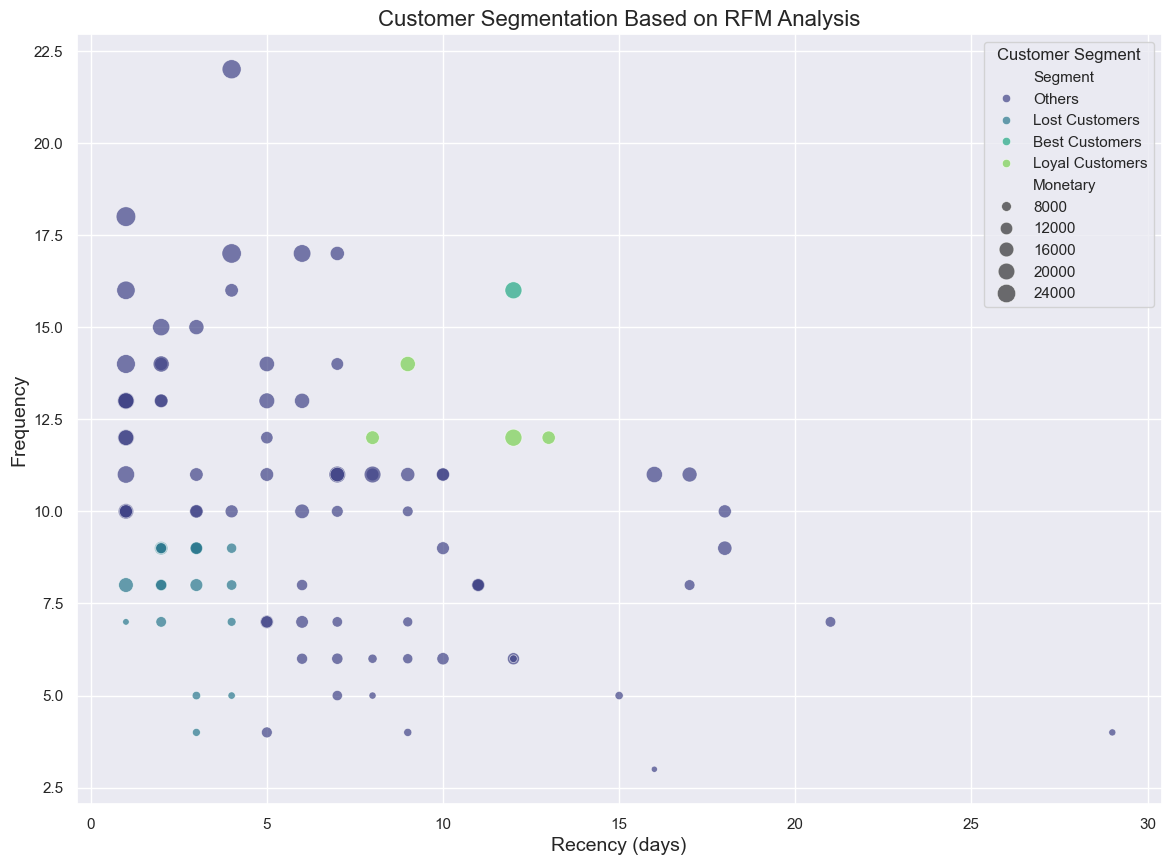

In [83]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Recency', y='Frequency', size='Monetary', hue='Segment', data=rfm, sizes=(20, 200), palette="viridis", alpha=0.7)

plt.title('Customer Segmentation Based on RFM Analysis', fontsize=16)
plt.xlabel('Recency (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right', title='Customer Segment')
plt.grid(True)
plt.show()

## Product Performance Analysis

### Product Sales

In [84]:
merged_df

,customer_id,name,order_id,product_id,order_date,quantity,product_name,price,category,rating,category_id,Total_sales
0,1,Customer_1,13,33,2023-07-31 08:39:23.971834,1,Lerhamn Chair,125.0,Chairs,0,0,125.0
1,1,Customer_1,14,20,2023-08-02 08:39:23.971834,1,Pjatteryd Picture,715.0,Decor,0,1,715.0
2,1,Customer_1,34,5,2023-09-05 08:39:23.971834,4,Hemnes Daybed,845.0,Beds,0,2,3380.0
3,1,Customer_1,67,44,2023-08-03 08:39:23.971834,1,Koppang Dresser,765.0,Decor,0,1,765.0
4,1,Customer_1,79,32,2023-09-07 08:39:23.971834,2,Kivik Chaise,926.0,Sofas & Armchairs,0,3,1852.0
...,...,...,...,...,...,...,...,...,...,...,...,...
997,100,Customer_100,532,25,2023-09-06 08:39:23.971834,1,Rens Sheepskin Rug,610.0,Decor,0,1,610.0
998,100,Customer_100,553,8,2023-07-30 08:39:23.971834,1,Melltorp Dining Table,369.0,Tables & Desks,0,4,369.0
999,100,Customer_100,674,46,2023-08-12 08:39:23.971834,4,Valje Wall Cabinet,669.0,Storage Solutions,0,5,2676.0
1000,100,Customer_100,714,6,2023-08-27 08:39:23.971834,2,Brimnes Bed Storage,773.0,Beds,0,2,1546.0


In [85]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'])

In [86]:
product_total_sales_df = merged_df.groupby('product_name')['Total_sales'].sum().sort_values(ascending=True)
product_total_sales_df

product_name
Micke Desk                   817.0
Bernhard Chair              2880.0
Stuva Loft Bed              3104.0
Strandmon Wing Chair        5002.0
Lerhamn Chair               5125.0
Tingby Side Table           5232.0
Nymö Lamp Shade             7222.0
Sjöpenna Floor Lamp         8976.0
Askvoll Wardrobe            9200.0
Malm Bed Frame              9292.0
Billy Bookcase             11480.0
Ribba Frame                11988.0
Mörbylånga Table           14900.0
Stockholm Mirror           16864.0
Tarva Nightstand           18051.0
Skurup Ceiling Lamp        19894.0
Kivik Chaise               20372.0
Ranarp Lamp                21208.0
Melltorp Dining Table      22878.0
Rens Sheepskin Rug         23180.0
Ingolf Bar Stool           23751.0
Söderhamn Sofa Section     27279.0
Bekant Conference Table    27342.0
Hektar Work Lamp           27438.0
Lack Side Table            27963.0
Pjatteryd Picture          29315.0
Raskog Trolley             29796.0
Gronlid Armchair           30917.0
Sinnerl

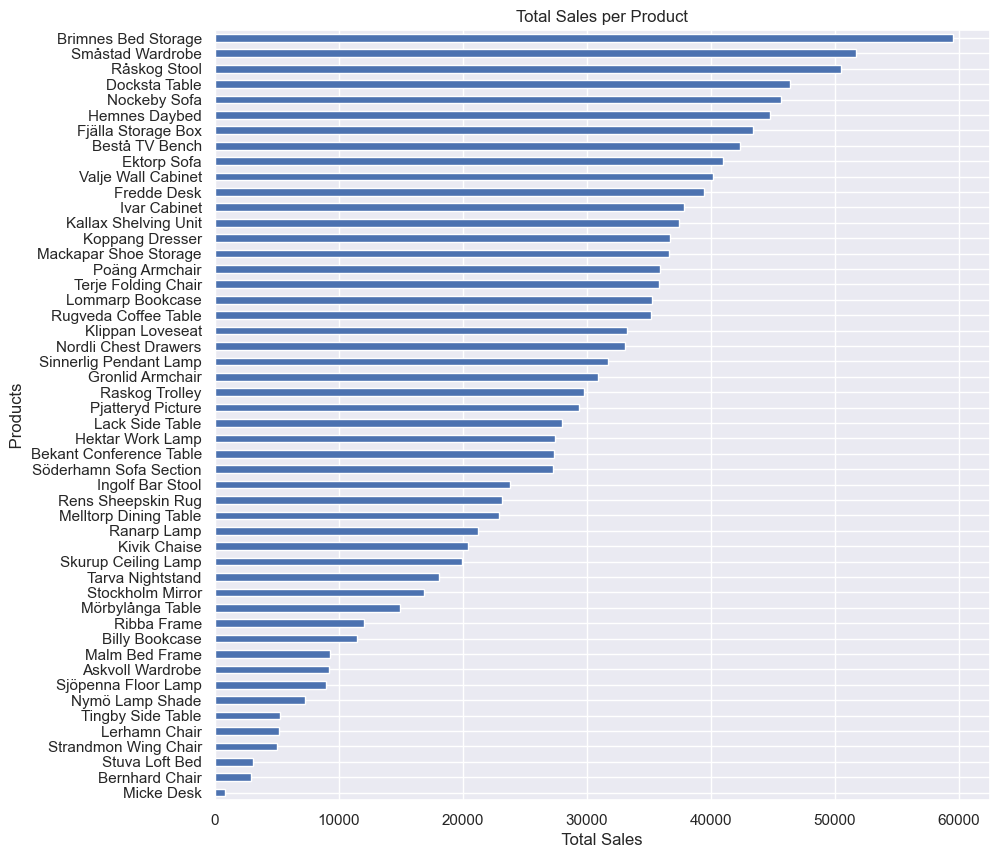

In [87]:
product_total_sales_df.plot(kind='barh', figsize=(10,10), title='Total Sales per Product')
plt.xlabel(' Total Sales ')
plt.ylabel(' Products ')
plt.show()

### Quantity Sold

In [88]:
product_quantity_sold_df = merged_df.groupby('product_name')['quantity'].sum().sort_values(ascending=True)
product_quantity_sold_df

product_name
Kivik Chaise               22
Stuva Loft Bed             32
Tarva Nightstand           33
Stockholm Mirror           34
Hektar Work Lamp           34
Bernhard Chair             36
Ribba Frame                37
Rens Sheepskin Rug         38
Lack Side Table            39
Raskog Trolley             39
Ingolf Bar Stool           39
Billy Bookcase             40
Lommarp Bookcase           41
Pjatteryd Picture          41
Lerhamn Chair              41
Micke Desk                 43
Gronlid Armchair           43
Fjälla Storage Box         44
Ranarp Lamp                44
Terje Folding Chair        44
Fredde Desk                46
Rugveda Coffee Table       46
Bestå TV Bench             46
Malm Bed Frame             46
Nymö Lamp Shade            46
Koppang Dresser            48
Sjöpenna Floor Lamp        48
Tingby Side Table          48
Skurup Ceiling Lamp        49
Askvoll Wardrobe           50
Mörbylånga Table           50
Kallax Shelving Unit       51
Klippan Loveseat           

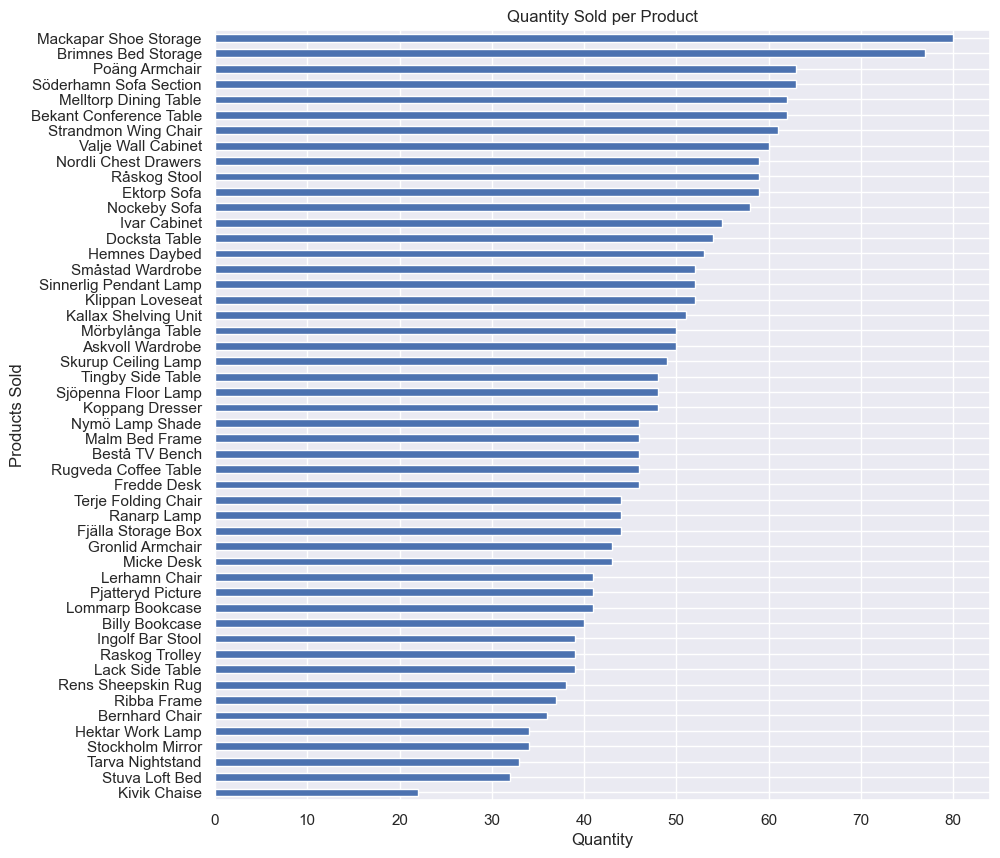

In [89]:
product_quantity_sold_df.plot(kind='barh', figsize=(10,10), title='Quantity Sold per Product')
plt.xlabel('Quantity')
plt.ylabel('Products Sold')
plt.show()

### Average Rating

In [90]:
product_rating_df = merged_df.groupby('product_name')['rating'].mean().sort_values(ascending=True)
product_rating_df

product_name
Lerhamn Chair              0.000000
Söderhamn Sofa Section     0.000000
Docksta Table              0.000000
Ektorp Sofa                0.000000
Fjälla Storage Box         0.000000
Rens Sheepskin Rug         0.000000
Gronlid Armchair           0.000000
Mörbylånga Table           0.000000
Billy Bookcase             0.052632
Rugveda Coffee Table       0.095238
Kivik Chaise               0.100000
Tingby Side Table          0.105263
Ranarp Lamp                0.105263
Mackapar Shoe Storage      0.121212
Askvoll Wardrobe           0.142857
Sjöpenna Floor Lamp        0.166667
Kallax Shelving Unit       0.190476
Raskog Trolley             0.200000
Bestå TV Bench             0.200000
Råskog Stool               0.208333
Småstad Wardrobe           0.238095
Bernhard Chair             0.250000
Lommarp Bookcase           0.250000
Ribba Frame                0.250000
Terje Folding Chair        0.263158
Melltorp Dining Table      0.285714
Bekant Conference Table    0.296296
Pjatteryd Pictu

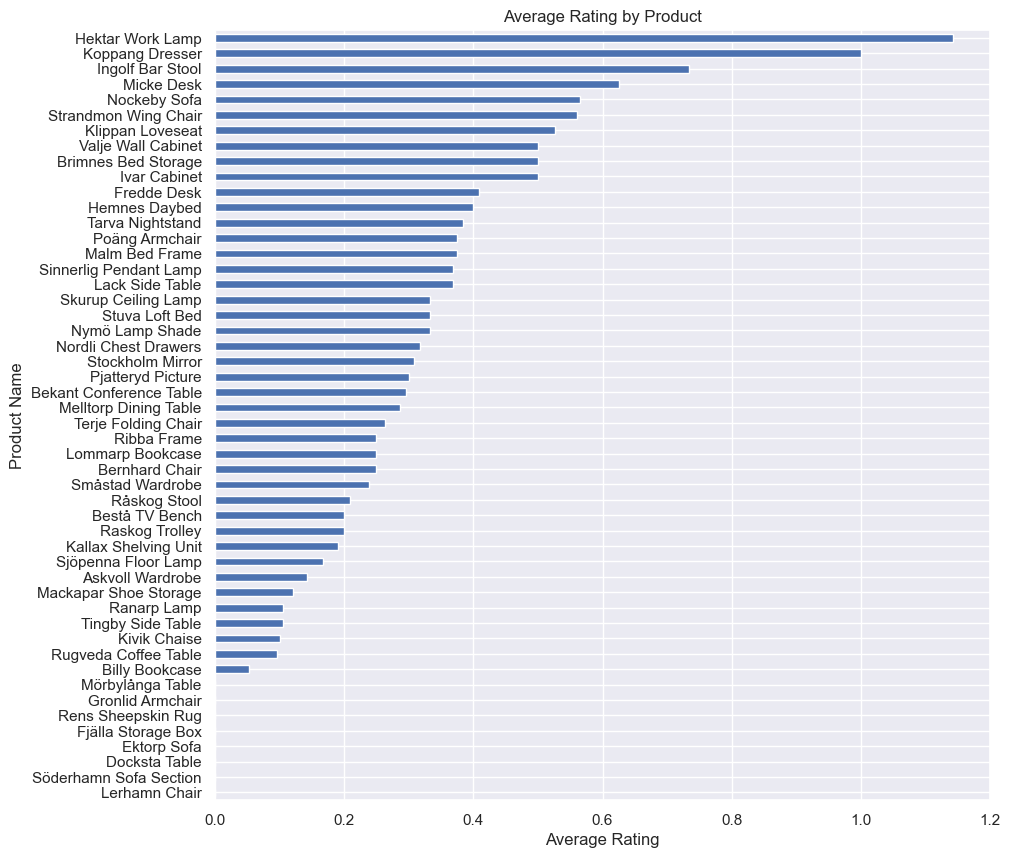

In [91]:
product_rating_df.plot(kind='barh', figsize=(10, 10), title='Average Rating by Product')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

### Time Series Analysis

In [92]:
df = merged_df.set_index('order_date', inplace=True)
df

In [93]:
daily_sales = merged_df['Total_sales'].resample('D').sum()
daily_sales

order_date
2023-07-20    27748.0
2023-07-21    21636.0
2023-07-22    23860.0
2023-07-23    30581.0
2023-07-24    30383.0
2023-07-25    13810.0
2023-07-26    21196.0
2023-07-27    37052.0
2023-07-28    15571.0
2023-07-29    12619.0
2023-07-30    13052.0
2023-07-31    30619.0
2023-08-01    13074.0
2023-08-02    16505.0
2023-08-03    12657.0
2023-08-04    18483.0
2023-08-05    23824.0
2023-08-06    35096.0
2023-08-07    28186.0
2023-08-08    19945.0
2023-08-09    15637.0
2023-08-10    19982.0
2023-08-11    27067.0
2023-08-12    20267.0
2023-08-13    26658.0
2023-08-14    21459.0
2023-08-15    13706.0
2023-08-16    25175.0
2023-08-17    23194.0
2023-08-18    34796.0
2023-08-19    25343.0
2023-08-20    14241.0
2023-08-21    14932.0
2023-08-22    24309.0
2023-08-23    32348.0
2023-08-24    14615.0
2023-08-25    22206.0
2023-08-26    26067.0
2023-08-27    25966.0
2023-08-28    24753.0
2023-08-29    33547.0
2023-08-30     9683.0
2023-08-31    29535.0
2023-09-01    18752.0
2023-09-02    19990.0

<Figure size 1000x600 with 0 Axes>

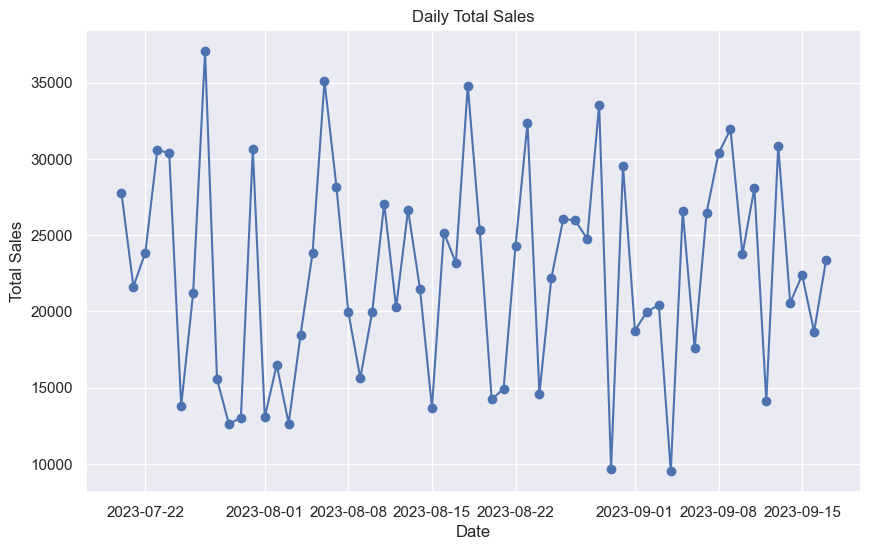

In [94]:
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
plt.plot(daily_sales, marker='o', linestyle='-')
plt.title('Daily Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()